<a href="https://colab.research.google.com/github/gpostill/Applied-ML-for-Healthcare-Course-Project/blob/main/Project_Descriptive_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Part 1: Code for Descriptive Analysis with Dummy Data




##Creating a Dummy Dataset

In [ ]:
#mount drive - for Import Option 1
from google.colab import drive
drive.mount('/content/drive')

##importing libraries
import pandas as pd
import numpy as np

#Creating a DataFrame with random data
np.random.seed(0)   #Set a random seed for reproducibility

#Note that there may be inconsistencies in that some people will have diagnosis dates after their death date

data = {'ID': range(1,301), #300 rows
      'Age_death': np.random.randint(1,110,300),
      'sex': np.random.randint(0,2,300), #0(Male), 1(Female)

      #Adding the dconditions -- Random yes (1) / no (0) to indicate presence or absence of disease
      'Asthma': np.random.randint(0,2,300),
      'CHF': np.random.randint(0,2,300),
      'COPD': np.random.randint(0,2,300),
      'Myocardial_infarction': np.random.randint(0,2,300),
      'Hypertension': np.random.randint(0,2,300),
      'Arrythmia': np.random.randint(0,2,300),
      'CCS': np.random.randint(0,2,300),
      'Stroke': np.random.randint(0,2,300),
      'Cancer': np.random.randint(0,2,300),
      'Dementia': np.random.randint(0,2,300),
      'Rental_disease': np.random.randint(0,2,300), #I know this is spelt wrong but the analyst misspelled and I haven't changed
      'Diabetes': np.random.randint(0,2,300),
      'Osteoporosis': np.random.randint(0,2,300),
      'Rheumatoid_Arthritis': np.random.randint(0,2,300),
      'Oseo_Arthritis': np.random.randint(0,2,300),
      'Mood_disorder': np.random.randint(0,2,300),
      'Other_Mental_disorder': np.random.randint(0,2,300),

      #Adding the random age of death
      'Age_Asthma': np.random.randint(18,95,300),
      'Age_CHF': np.random.randint(18,95,300),
      'Age_COPD': np.random.randint(18,95,300),
      'Age_Myocardial_infarction': np.random.randint(18,95,300),
      'Age_Hypertension': np.random.randint(18,95,300),
      'Age_Arrythmia': np.random.randint(18,95,300),
      'Age_CCS': np.random.randint(18,95,300),
      'Age_Stroke': np.random.randint(18,95,300),
      'Age_Cancer': np.random.randint(18,95,300),
      'Age_Dementia': np.random.randint(18,95,300),
      'Age_Rental_disease': np.random.randint(18,95,300), #I know this is spelt wrong but the analyst misspelled and I haven't changed
      'Age_Diabetes': np.random.randint(18,95,300),
      'Age_Osteoporosis': np.random.randint(18,95,300),
      'Age_Rheumatoid_Arthritis': np.random.randint(18,95,300),
      'Age_Oseo_Arthritis': np.random.randint(18,95,300),
      'Age_Mood_disorder': np.random.randint(18,95,300),
      'Age_Other_Mental_disorder': np.random.randint(18,95,300)

      }

#Formatting data into a dataframe structure
df = pd.DataFrame(data)
print(df)

#Removing age of death if no dx:
conditions = ['Asthma','CHF','COPD','Myocardial_infarction','Hypertension','Arrythmia','CCS','Stroke','Cancer','Dementia',
              'Rental_disease','Diabetes','Osteoporosis','Rheumatoid_Arthritis','Oseo_Arthritis','Mood_disorder','Other_Mental_disorder']

age_conditions = ['Age_Asthma','Age_CHF','Age_COPD','Age_Myocardial_infarction','Age_Hypertension','Age_Arrythmia','Age_CCS','Age_Stroke','Age_Cancer','Age_Dementia',
                  'Age_Rental_disease','Age_Diabetes','Age_Osteoporosis','Age_Rheumatoid_Arthritis','Age_Oseo_Arthritis','Age_Mood_disorder','Age_Other_Mental_disorder']

for cond,age in zip(conditions,age_conditions):
    df.loc[df[cond] == 0, age] = np.nan


#Creating a Premature Variable
df['Premature'] = ''
df.loc[df['Age_death'] < 75, 'Premature'] = 1
df.loc[df['Age_death'] >= 75, 'Premature'] = 0


#NOTE: I did not add missingness to other sociodemographic variables

#exporting the data as a csv
df.to_csv('drive/My Drive/CHL5320_Course_Project/DummyData.csv', index = False)



Mounted at /content/drive
      ID  Age_death  sex  Asthma  CHF  COPD  Myocardial_infarction  \
0      1         45    0       1    1     0                      0   
1      2         48    1       1    0     1                      1   
2      3         65    0       1    0     1                      1   
3      4         68    1       1    0     1                      0   
4      5         68    0       1    1     1                      0   
..   ...        ...  ...     ...  ...   ...                    ...   
295  296          6    0       1    1     1                      0   
296  297        105    0       0    0     0                      1   
297  298         37    1       1    1     1                      0   
298  299          1    1       0    1     0                      0   
299  300         76    1       1    0     0                      0   

     Hypertension  Arrythmia  CCS  ...  Age_Stroke  Age_Cancer  Age_Dementia  \
0               0          0    1  ...          33   

##Exploratory data analysis

In [ ]:
# Import libraries
import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Check for missing values in the dataset
df = pd.read_csv('DummyData.csv')
print(df.isna().sum())

ID                             0
Age_death                      0
sex                            0
Asthma                         0
CHF                            0
COPD                           0
Myocardial_infarction          0
Hypertension                   0
Arrythmia                      0
CCS                            0
Stroke                         0
Cancer                         0
Dementia                       0
Rental_disease                 0
Diabetes                       0
Osteoporosis                   0
Rheumatoid_Arthritis           0
Oseo_Arthritis                 0
Mood_disorder                  0
Other_Mental_disorder          0
Age_Asthma                   146
Age_CHF                      166
Age_COPD                     131
Age_Myocardial_infarction    154
Age_Hypertension             148
Age_Arrythmia                141
Age_CCS                      142
Age_Stroke                   142
Age_Cancer                   148
Age_Dementia                 155
Age_Rental

In [ ]:
# Summary Statistics
print(df.describe())
df

               ID   Age_death         sex      Asthma         CHF        COPD  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean   150.500000   52.873333    0.500000    0.513333    0.446667    0.563333   
std     86.746758   31.090072    0.500835    0.500657    0.497978    0.496801   
min      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%     75.750000   28.000000    0.000000    0.000000    0.000000    0.000000   
50%    150.500000   51.000000    0.500000    1.000000    0.000000    1.000000   
75%    225.250000   80.000000    1.000000    1.000000    1.000000    1.000000   
max    300.000000  109.000000    1.000000    1.000000    1.000000    1.000000   

       Myocardial_infarction  Hypertension   Arrythmia         CCS  ...  \
count             300.000000    300.000000  300.000000  300.000000  ...   
mean                0.486667      0.506667    0.530000    0.526667  ...   
std                 0.500657      0.500791   

,ID,Age_death,sex,Asthma,CHF,COPD,Myocardial_infarction,Hypertension,Arrythmia,CCS,...,Age_Cancer,Age_Dementia,Age_Rental_disease,Age_Diabetes,Age_Osteoporosis,Age_Rheumatoid_Arthritis,Age_Oseo_Arthritis,Age_Mood_disorder,Age_Other_Mental_disorder,Premature
0,1,45,0,1,1,0,0,0,0,1,...,74.0,38.0,33.0,41.0,47.0,NaN,93.0,NaN,NaN,1
1,2,48,1,1,0,1,1,0,1,1,...,NaN,NaN,NaN,35.0,66.0,NaN,70.0,50.0,NaN,1
2,3,65,0,1,0,1,1,0,0,0,...,NaN,NaN,53.0,78.0,74.0,NaN,NaN,66.0,NaN,1
3,4,68,1,1,0,1,0,0,0,0,...,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,68,0,1,1,1,0,0,1,0,...,NaN,NaN,43.0,NaN,NaN,NaN,37.0,NaN,73.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,6,0,1,1,1,0,1,1,1,...,NaN,30.0,35.0,40.0,50.0,66.0,23.0,NaN,NaN,1
296,297,105,0,0,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,71.0,NaN,25.0,30.0,51.0,0
297,298,37,1,1,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,1
298,299,1,1,0,1,0,0,0,0,1,...,46.0,46.0,NaN,NaN,47.0,NaN,35.0,NaN,NaN,1


In [ ]:
# Check the distribution of age
# Create an interactive histogram for 'age'
fig = px.histogram(df, x='Age_death', nbins=50, title='Distribution of Age at death', color_discrete_sequence=['#b59a36'])
fig.show('colab')

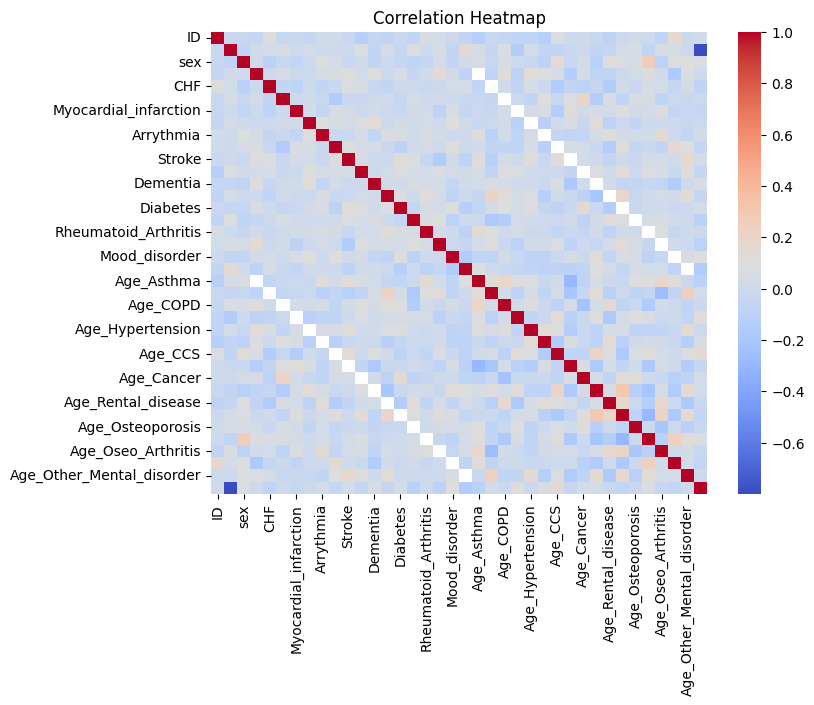

In [ ]:
#Check for collinearity

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Axes: >

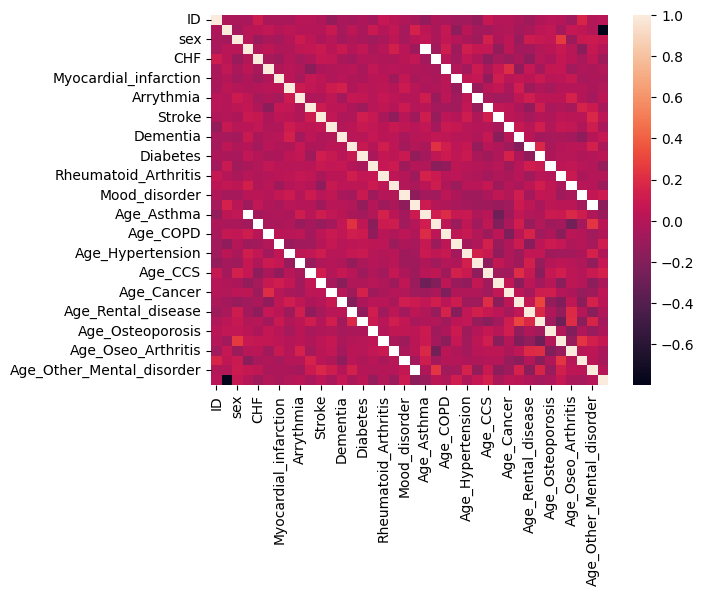

In [ ]:
sns.heatmap(df.corr())

## Assessing for class imbalance

In [ ]:
counts = df['Premature'].value_counts()
print("Counts:")
print(counts)
print("\nPercents:")
print(counts/sum(counts)*100)



Counts:
1    212
0     88
Name: Premature, dtype: int64

Percents:
1    70.666667
0    29.333333
Name: Premature, dtype: float64
